In [1]:
import pandas as pd
import numpy as np


In [2]:

# developing the model (logistic regression)
class ScratchLogisticRegression():
    
    def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lamda = 1/0.01
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _check_for_bais(self,X):
        if self.bias == True:
            x1 = np.ones(X.shape[0])
        else:
            x1 = np.zeros(X.shape[0])
        
        return np.concatenate([x1.reshape(-1,1),X],axis=1)
    
       # 【problem1】Hypothetical function
        
    def _sigmoid_function(self,X):
        linear_model = np.dot(X,self.theta)
        
        return 1/(1+np.exp(-linear_model))
    
    def _gradient_descent(self, X, error):
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)
        
        #[Problem 4] Objective function
    def _loss_function(self, y, y_pred):
        return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)
        
    def fit(self, X, y, X_val=False, y_val=False):
        
        self.ylabel = np.unique(y)
        
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        X = self._check_for_bais(X)
        
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            y_pred = self._sigmoid_function(X)
            error = y_pred - y            
            self.loss[i] = self._loss_function(y,y_pred)
            
            if (type(X_val) != bool):
                val_X = self._check_for_bais(X_val)
                val_ypred = self._sigmoid_function(val_X)
                
                self.val_loss[i] = self._loss_function(y_val,val_ypred)
            
            self._gradient_descent(X, error)
            
            if self.verbose:
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
            
        np.save('theta', self.theta)            

    def predict(self, X):
        X = self._check_for_bais(X)
        y_pred = self._sigmoid_function(X)
        
        return np.where(y_pred<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        X = self._check_for_bais(X)
        return self._sigmoid_function(X)

【problem 3】Estimated

In [3]:
# creating datasets
from sklearn import datasets
data = datasets.load_breast_cancer()
X, y = data.data, data.target

In [4]:
from sklearn.model_selection import train_test_split
# spliting the datasets into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# creating an instance of our model
lr = ScratchLogisticRegression(num_iter=1000, lr=0.001, verbose=False)
lr.fit(X_train,y_train,X_test,y_test)
y_pred_label = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)

print("Labels ",y_pred_label)
print("Probability:",y_pred_proba)

<ipython-input-2-bb489bd5d7db>:34: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)
<ipython-input-2-bb489bd5d7db>:34: RuntimeWarning: invalid value encountered in multiply
  return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)
<ipython-input-2-bb489bd5d7db>:26: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-linear_model))


Labels  [0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1
 0 0 0]
Probability: [2.16474942e-041 1.00000000e+000 1.00000000e+000 3.06229929e-016
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.57226746e-003 5.04335287e-002
 1.00000000e+000 1.79156696e-016 4.26185556e-006 2.04798057e-085
 1.00000000e+000 1.80507964e-181 4.50363424e-024 5.60950295e-232
 5.88920805e-092 1.09827432e-029 1.00000000e+000 1.00000000e+000
 1.73869982e-041 7.08533794e-001 1.00000000e+000 1.00000000e+000
 1.00000000e+000 8.92066728e-252 1.00000000e+000 1.73629489e-222
 9.98927252e-001 2.07235438e-082 1.00000000e+000 1.06683740e-075
 9.13733484e-006 9.60359108e-123 9.99999998e-001 3.79954616e-070
 6.51455385e-028 1.00000000e+000 2.20145456e-080 1.00000000e+000
 7.70994793e-003 5.30878744e-21

[Problem 5] Learning and estimation

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
data = iris.data
target = iris.target.reshape(-1,1)
iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
X1 = iris.loc[iris[4]!=0,2:3].values
y1 = iris.loc[iris[4]!=0,4].values

In [7]:
# spliting the datasets into training and testing subsets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test= scaler.transform(X1_test)

# creating an instance of our model
lr_1 = ScratchLogisticRegression(num_iter=500, lr=0.01, verbose=False)
lr_1.fit(X1_train, y1_train, X1_test, y1_test)
y_pred_label_1 = lr_1.predict(X1_test)
y_pred_proba_1 = lr_1.predict_proba(X1_test)

print("y pred:",y_pred_label_1)

y pred: [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1.]


In [9]:
accuracy = accuracy_score(y1_test, y_pred_label_1)
precision = precision_score(y1_test, y_pred_label_1, average='weighted')
recall = recall_score(y1_test, y_pred_label_1, average='weighted')

print("-------------")
print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

-------------
accuracy 0.95
precision 0.9545454545454545
recall 0.95


[Problem 6] Plot of learning curve

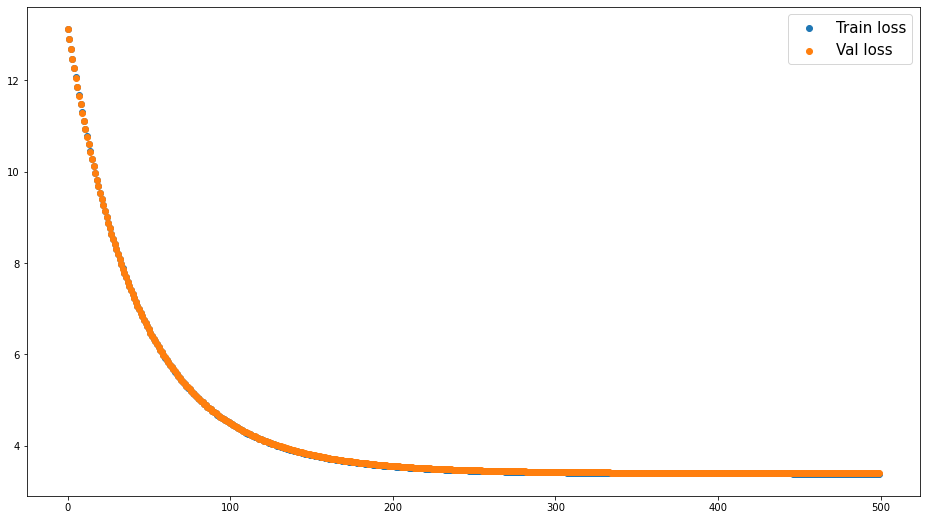

In [10]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 15
plt.scatter(range(len(lr_1.loss)),lr_1.loss,label='Train loss')
plt.scatter(range(len(lr_1.val_loss)),lr_1.val_loss,label='Val loss')
plt.legend();

[Problem 7] Visualization of decision area

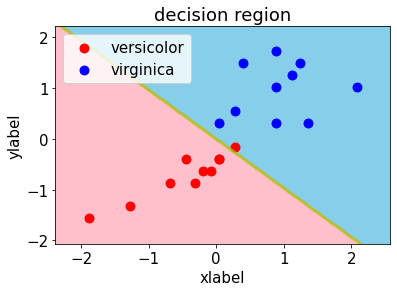

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X1_test, y1_test, lr_1)